In [9]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import yfinance as yf

In [12]:
start = '2010-01-01'
end = dt.datetime.now()

df = yf.download('AAPL',start,end )
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.461977,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.473147,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.370184,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.358407,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.400681,447610800


In [13]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-05-13,185.440002,187.100006,184.619995,186.279999,186.279999,72044800
2024-05-14,187.509995,188.300003,186.289993,187.429993,187.429993,52393600
2024-05-15,187.910004,190.649994,187.369995,189.720001,189.720001,70400000
2024-05-16,190.470001,191.100006,189.660004,189.839996,189.839996,52800800
2024-05-17,189.380005,190.809998,189.220001,190.089996,190.089996,9332980


In [14]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.461977,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.473147,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.370184,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.358407,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.400681,447610800


In [15]:
df = df.drop(['Adj Close'],axis = 1)
df.head()

,Date,Open,High,Low,Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,447610800


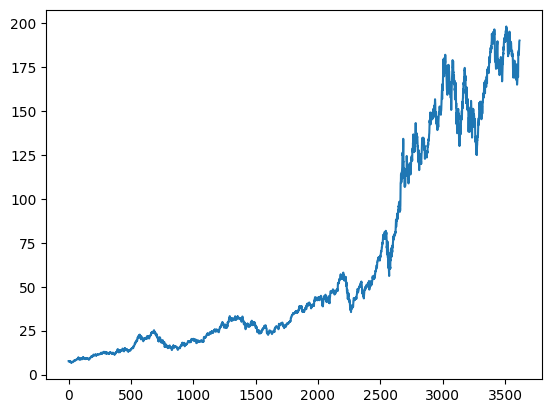

In [16]:
plt.plot(df.Close)

In [17]:
ma100 = df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3613    180.0177
3614    179.9226
3615    179.8715
3616    179.8231
3617    179.7880
Name: Close, Length: 3618, dtype: float64

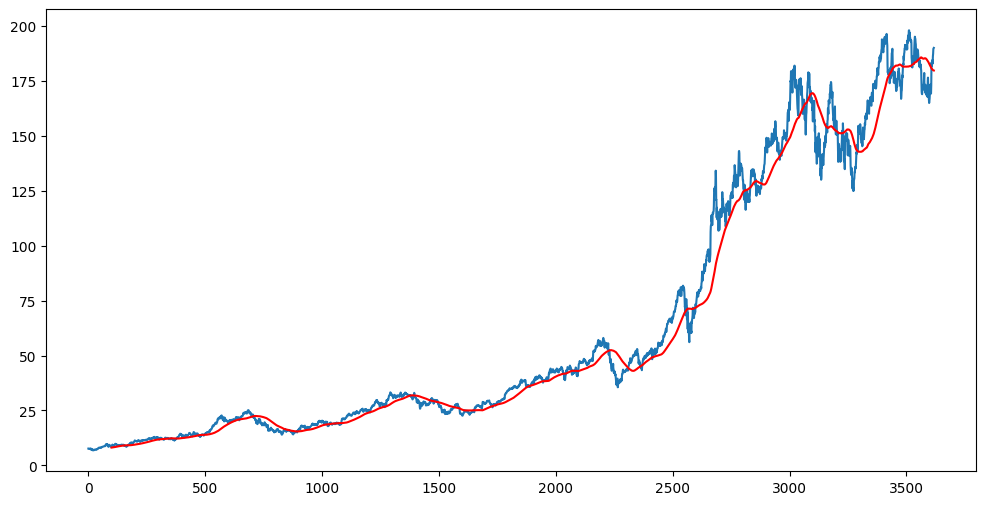

In [18]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [19]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3613    180.89510
3614    180.85310
3615    180.81945
3616    180.79060
3617    180.77815
Name: Close, Length: 3618, dtype: float64

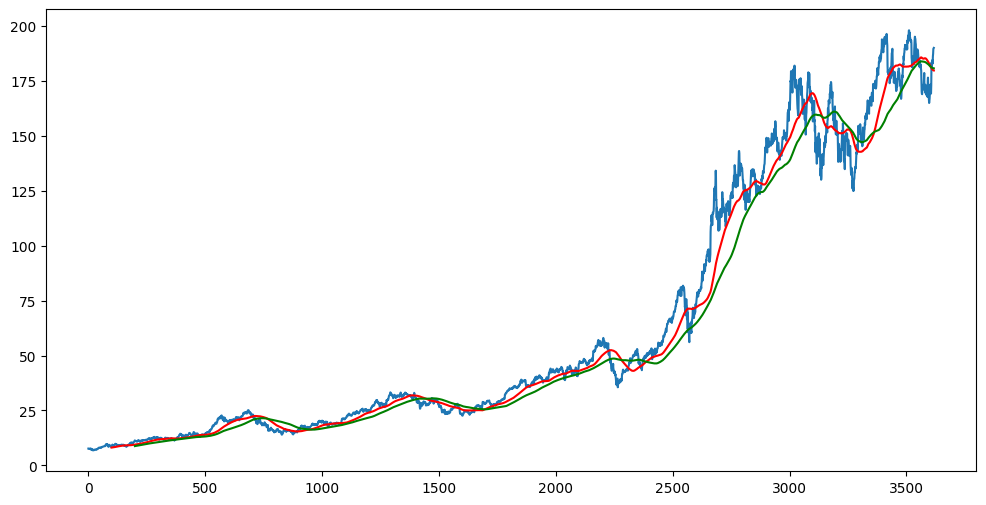

In [20]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [22]:
df.shape

(3618, 6)

In [25]:
data_train = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_test = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_train.shape)
print(data_test.shape)

(2532, 1)
(1086, 1)


In [26]:
data_train.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [27]:
data_test.head()

,Close
2532,77.237503
2533,79.422501
2534,81.084999
2535,80.967499
2536,77.377502


In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [30]:
data_training_array = scaler.fit_transform(data_train)
data_training_array

array([[0.0107512 ],
       [0.01093235],
       [0.00926288],
       ...,
       [0.99475658],
       [1.        ],
       [0.99684705]])

In [31]:
data_training_array.shape

(2532, 1)

In [33]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i , 0])                           


x_train,y_train = np.array(x_train) , np.array(y_train)                   

In [35]:
from keras.layers import Dense, Dropout , LSTM
from keras.models import Sequential

In [37]:
model = Sequential()
model.add(LSTM(units = 50 , activation = 'relu' , return_sequences=True, input_shape =(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60 , activation = 'relu' , return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80 , activation = 'relu' , return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120 , activation = 'relu' ))
model.add(Dropout(0.5))

model.add(Dense(units =1))

In [38]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                        │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [39]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train,y_train , epochs = 50)

Epoch 1/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 11s 90ms/step - loss: 0.0395
Epoch 2/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 7s 86ms/step - loss: 0.0049
Epoch 3/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 7s 93ms/step - loss: 0.0042
Epoch 4/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 7s 91ms/step - loss: 0.0034
Epoch 5/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 7s 89ms/step - loss: 0.0036
Epoch 6/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 7s 90ms/step - loss: 0.0033
Epoch 7/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 7s 90ms/step - loss: 0.0034
Epoch 8/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 7s 87ms/step - loss: 0.0026
Epoch 9/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 7s 92ms/step - loss: 0.0027
Epoch 10/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 7s 88ms/step - loss: 0.0026
Epoch 11/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 7s 85ms/step - loss: 0.0025
Epoch 12/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 7s 93ms/step - loss: 0.0027
Epoch 13/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 7s 91ms/step - loss: 0.0022
Epoch 14/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 7s 85ms/step - loss: 0.0020
Epoch 15/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 7s 90ms/step - loss: 0.0023
Epo

In [41]:
model.save('keras_model.h5')

In [42]:
model.save('new_model.keras')

In [43]:
data_test.head()

,Close
2532,77.237503
2533,79.422501
2534,81.084999
2535,80.967499
2536,77.377502


In [44]:
past_100_days = data_train.tail(100)

In [49]:
final_df = pd.concat([past_100_days, data_test], ignore_index=True)


In [50]:
final_df.head()

,Close
0,51.424999
1,52.297501
2,53.320000
3,53.314999
4,53.542500


In [51]:
input_data = scaler.fit_transform(final_df)

In [53]:
 input_data

array([[0.        ],
       [0.00594813],
       [0.01291884],
       ...,
       [0.94280261],
       [0.94362066],
       [0.94532499]])

In [54]:
input_data.shape

(1186, 1)

In [56]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i, 0])
    

In [57]:
x_test , y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1086, 100, 1)
(1086,)


In [58]:
y_predicted = model.predict(x_test)

34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step


In [59]:
y_predicted.shape

(1086, 1)

In [60]:
y_test

array([0.17597235, 0.19086819, 0.20220199, ..., 0.94280261, 0.94362066,
       0.94532499])

In [61]:
y_predicted

array([[0.22782695],
       [0.22942159],
       [0.23072788],
       ...,
       [0.841499  ],
       [0.85275996],
       [0.86349356]], dtype=float32)

In [62]:
scaler.scale_

array([0.00681733])

In [63]:
scale_factor = 1/0.00681733
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

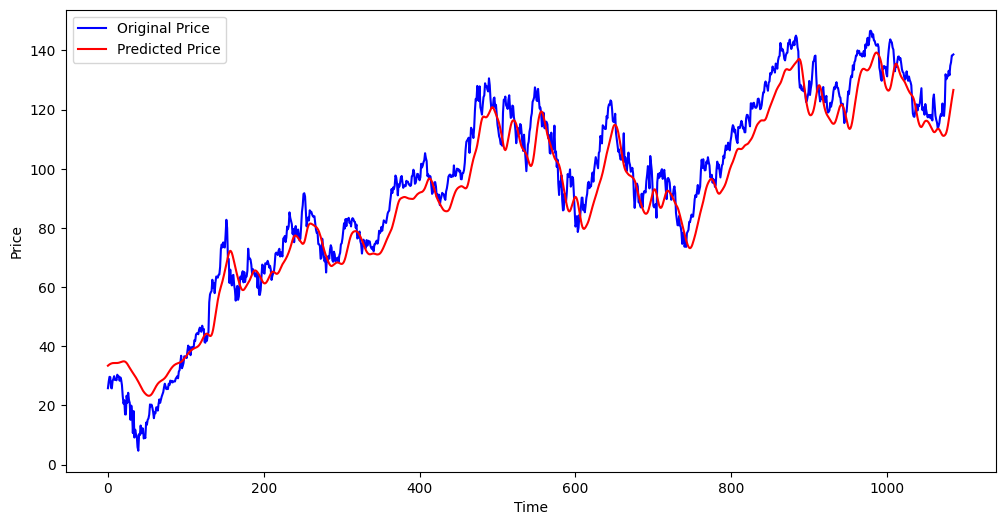

In [65]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b' , label = "Original Price")
plt.plot(y_predicted, 'r' , label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()